In [1]:
### LOAD an image INTO A tf.Dataset

# Data: Flowers photo to classify

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
### Load the data
import pathlib

data_path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                    fname = 'flower_photos', # Name of the file
                                    untar = True) # whether the file should be decompressed
print(type(data_path))
print(data_path)
print('-'*30)
# Create a Path object to explore repositories from data_path
data_root = pathlib.Path(data_path)
print(type(data_root))
print(data_root)

<class 'str'>
/Users/nicolas/.keras/datasets/flower_photos
------------------------------
<class 'pathlib.PosixPath'>
/Users/nicolas/.keras/datasets/flower_photos


In [5]:
# Explore the data_root directoy

for item in data_root.iterdir():
    print(item)

/Users/nicolas/.keras/datasets/flower_photos/roses
/Users/nicolas/.keras/datasets/flower_photos/sunflowers
/Users/nicolas/.keras/datasets/flower_photos/daisy
/Users/nicolas/.keras/datasets/flower_photos/dandelion
/Users/nicolas/.keras/datasets/flower_photos/tulips
/Users/nicolas/.keras/datasets/flower_photos/LICENSE.txt


In [6]:
# Take all the images' path in each folder, and shuffle them

import random

# Get all images' path in a list
all_image_paths = list(data_root.glob('*/*'))
# Convert the path to string
all_image_paths = [str(path) for path in all_image_paths]
# Shuffle
random.shuffle(all_image_paths)

IMAGE_COUNT = len(all_image_paths)
print('Number of images: ', IMAGE_COUNT)

print('10 first image paths: ')
print(all_image_paths[:10])

Number of images:  3670
10 first image paths: 
['/Users/nicolas/.keras/datasets/flower_photos/dandelion/142390525_5d81a3659d_m.jpg', '/Users/nicolas/.keras/datasets/flower_photos/daisy/9345273630_af3550031d.jpg', '/Users/nicolas/.keras/datasets/flower_photos/tulips/8668974855_8389ecbdca_m.jpg', '/Users/nicolas/.keras/datasets/flower_photos/tulips/13510057763_01b832d919.jpg', '/Users/nicolas/.keras/datasets/flower_photos/roses/123128873_546b8b7355_n.jpg', '/Users/nicolas/.keras/datasets/flower_photos/roses/6473543547_4fefdbd5dc.jpg', '/Users/nicolas/.keras/datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg', '/Users/nicolas/.keras/datasets/flower_photos/dandelion/4635296297_9ce69e4a6e.jpg', '/Users/nicolas/.keras/datasets/flower_photos/dandelion/506659320_6fac46551e.jpg', '/Users/nicolas/.keras/datasets/flower_photos/dandelion/2481428401_bed64dd043.jpg']


In [7]:
# Let's have a quick look at a couple of the images

import os

# Extend the Path object to the Licence file
licence = (data_root/'LICENSE.txt')
print(licence)
# Open it in read mode, and get the first 4 lines of text (it represent the whole file)
sample = licence.open(encoding = 'utf-8').readlines()[4:]
# Split the text
sample = [line.split(' CC-BY') for line in sample]
print(sample[:5])
print('-'*30)
# Convert the sample to a dictionary (.jpg file, image_description) pairs
sample = dict(sample)
print(sample)

/Users/nicolas/.keras/datasets/flower_photos/LICENSE.txt
[['daisy/7568630428_8cf0fc16ff_n.jpg', ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n'], ['daisy/7410356270_9dff4d0e2e_n.jpg', ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n'], ['daisy/4286053334_a75541f20b_m.jpg', ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n'], ['daisy/10770585085_4742b9dac3_n.jpg', ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n'], ['daisy/8759177308_951790e00d_m.jpg', ' by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n']]
------------------------------
{'daisy/7568630428_8cf0fc16ff_n.jpg': ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n', 'daisy/7410356270_9dff4d0e2e_n.jpg': ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n', 'daisy/4286053334_a75541f20b_m.jpg': ' by jenny

In [8]:
# Define a method to return the caption of an image

def caption_image(image_path):
    # Extract the name of the picture from its path
    image_name = pathlib.Path(image_path).relative_to(data_root)
    # Get the authors' name
    return 'Image (CC BY 2.0) ' + ' - '.join(sample[str(image_name)].split(' - ')[:-1])

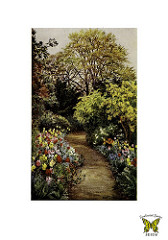

Image (CC BY 2.0)  by Swallowtail Garden Seeds



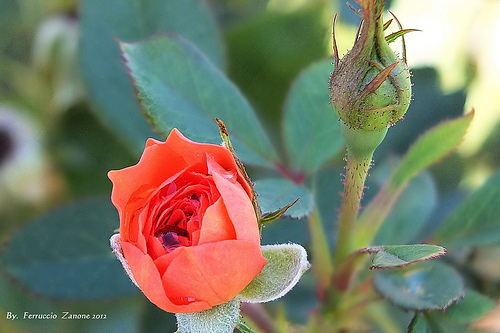

Image (CC BY 2.0)  by Ferruccio Zanone



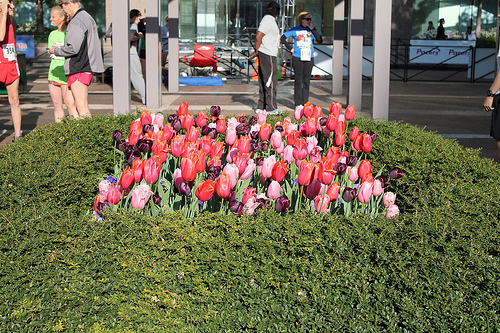

Image (CC BY 2.0)  by Elvert Barnes



In [9]:
# Plot the first 3 images
import IPython.display as display

for index in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [10]:
# Get all the available labels

print(next(data_root.glob('*/')))

# .name return the name of the folder
LABEL_NAMES = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print(LABEL_NAMES)

/Users/nicolas/.keras/datasets/flower_photos/roses
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [11]:
# Assign an index to each label

label_to_index = dict((name, index) for index, name in enumerate(LABEL_NAMES))
print(label_to_index)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [12]:
# Create a list containing the target values

#.parent to get the folder path, then .name to get the folder name
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print('First ten label of the training set: ', all_image_labels[:10])

First ten label of the training set:  [1, 0, 4, 4, 2, 2, 2, 1, 1, 1]


In [13]:
# Tensorflow includes tool to load and preprocess an image

# Take the first image
image_path = all_image_paths[0]
print('Image path: ', image_path)
print('-'*30)
# Reads and outputs the entire contents of the input filename
image_raw = tf.io.read_file(image_path)
# The repr() method returns a printable representational string of the given object.
print(repr(image_raw)[:100] + '...')

Image path:  /Users/nicolas/.keras/datasets/flower_photos/dandelion/142390525_5d81a3659d_m.jpg
------------------------------
<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [14]:
# Decode the raw_image into an image tensor 

# Detects whether an image is a BMP, GIF, JPEG, or PNG,
# and performs the appropriate operation to convert the input bytes string into a Tensor of type dtype
image_tensor = tf.image.decode_image(image_raw)

print(image_tensor.shape) # (height x width x nb_channels)
print('-'*30)
print(image_tensor.dtype)
print('-'*30)
print(image_tensor)

(240, 235, 3)
------------------------------
<dtype: 'uint8'>
------------------------------
tf.Tensor(
[[[ 71 132 186]
  [ 72 133 187]
  [ 71 132 186]
  ...
  [125 186 240]
  [125 186 240]
  [125 186 240]]

 [[ 70 131 185]
  [ 71 132 186]
  [ 71 132 186]
  ...
  [126 187 241]
  [127 188 242]
  [127 188 242]]

 [[ 69 130 184]
  [ 70 131 185]
  [ 71 132 186]
  ...
  [123 184 238]
  [122 183 237]
  [122 183 237]]

 ...

 [[ 80 145 199]
  [ 80 145 201]
  [ 80 145 203]
  ...
  [245 254 255]
  [181 207 224]
  [135 181 217]]

 [[ 81 146 200]
  [ 80 145 201]
  [ 80 145 203]
  ...
  [254 255 253]
  [236 250 253]
  [168 194 209]]

 [[ 81 146 200]
  [ 80 145 201]
  [ 80 145 203]
  ...
  [250 253 246]
  [251 255 251]
  [240 249 246]]], shape=(240, 235, 3), dtype=uint8)


In [15]:
# Preprocess the image (resize, normalize)

# Note that resized images will be distorted if their original aspect ratio is not the same as size
image_final = tf.image.resize(image_tensor, [192, 192])
image_final = image_final/255.0

print('Image size: ', image_final.shape)
print('Min value: ', image_final.numpy().min())
print('Max value: ', image_final.numpy().max())

Image size:  (192, 192, 3)
Min value:  0.0
Max value:  1.0


In [16]:
# Generalize the resize/normalization by creating a method

def preprocess_image(image):
    ''' Resize and normalize the image
    image       raw image as a tensor
    '''
    # Decode a JPEG-encoded image to a uint8 tensor.
    image = tf.image.decode_jpeg(image, channels = 3)
    # Resize into squared image
    image = tf.image.resize(image, [192, 192])
    # Normalize
    image /= 255.0
    
    return image

# Generalize the loading and preprocessing of an image
def load_and_preprocess_image(path):
    '''
    path       path to the image (string)
    '''
    image = tf.io.read_file(path)
    return preprocess_image(image)

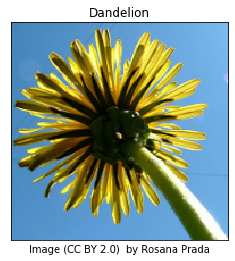

In [17]:
# Let's plot the 1st image

import matplotlib.pyplot as plt

# Get the 1st image path and label
image_path = all_image_paths[0]
image_label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False) # Remove the grid
plt.xlabel(caption_image(image_path)) # Add the caption using our method
plt.xticks([])
plt.yticks([])
plt.title(LABEL_NAMES[image_label].title()) # Use the label as the title of the image

plt.show()


In [18]:
### Let's build a tf.Dataset of images
# The easiest way is to use the usual from_tensor_slices method.
# Indeed, in our case, the images are an array of string(their paths).

# Call is path dataset since it contains the paths of the images
path_dataset = tf.data.Dataset.from_tensor_slices(all_image_paths)

print(path_dataset)

# Let's transform this dataset by loading the preprocessing the images
# (num_parallel_calls -> the number elements to process asynchronously in parallel.
# If the value tf.data.experimental.AUTOTUNE is used, then the number of parallel calls
# is set dynamically based on available CPU.)
image_dataset = path_dataset.map(load_and_preprocess_image, num_parallel_calls = AUTOTUNE)
print(image_dataset)

<TensorSliceDataset shapes: (), types: tf.string>
<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>


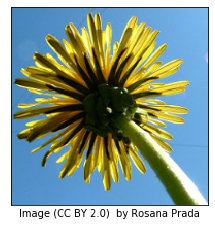

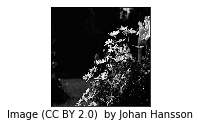

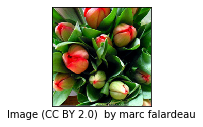

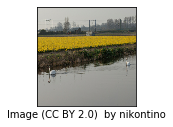

In [19]:
# Let's plot some images from the image_dataset

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8)) # Define and set the size of the figure
for index, image in enumerate(image_dataset.take(4)):
    # Grid of size (2 x 2) within the image
    plt.subplot(2, 2, index + 1)
    plt.imshow(image)
    plt.grid(False) # Remove the grid
    plt.xlabel(caption_image(all_image_paths[index])) # Add the caption using our method (note that we did not shuffle)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
# Note that the images are rescaled into squared images

In [20]:
# Let's construct a dataset of labels

label_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [21]:
# Let's explore the label dataset

for label in label_dataset.take(10):
    print(LABEL_NAMES[label.numpy()])

dandelion
daisy
tulips
tulips
roses
roses
roses
dandelion
dandelion
dandelion


In [22]:
# Since we did not shuffle the datasets, we can create a (image, label) dataset by zipping them

image_label_dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
# This dataset contains tuples of (image, label)
print(image_label_dataset)
print('-'*30)
# An alternative is to use the usual from_tensor_slices method
temp_dataset = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
    ''' The argument correspond to the dataset shape
    '''
    return load_and_preprocess_image(path), label

image_label_dataset = temp_dataset.map(load_and_preprocess_from_path_label)
print(image_label_dataset)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>
------------------------------
<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>


In [23]:
### Method for training
# 1/ Shuffle the dataset
# 2/ Batch the dataset
# 3/ (Repeat forever) ?
# 4/ Batches to be available as soon as possible

In [24]:
BATCH_SIZE = 32

dataset = image_label_dataset.shuffle(buffer_size = IMAGE_COUNT) # Shuffle the entire dataset
dataset = dataset.repeat() # Repeats this dataset count times.
dataset = dataset.batch(BATCH_SIZE)
# prefetch lets the dataset fetch batches in the background while the model is training
dataset = dataset.prefetch(buffer_size = AUTOTUNE)
print(dataset)

# Note that it is important to shuffle BEFORE repeat (otherwise some items can be seen twice before unseem item)
# suffle BEFORE batch, otherwise you shuffle the order of the batches
# BUT we want the training set to be reshuffled at EACH epoch

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [25]:
# Shuffle and repeats a Dataset returning a NEW permutation for each epoch
dataset = image_label_dataset.apply(tf.data.experimental.shuffle_and_repeat(buffer_size = IMAGE_COUNT))
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size = AUTOTUNE)
print(dataset)

W0909 17:59:58.267273 140735803462528 deprecation.py:323] From <ipython-input-25-736f344baf17>:2: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [26]:
### Pipe the dataset to a model
# We'll use a copy of MobileNet v2 model (transfer learning)

mobile_net = tf.keras.applications.MobileNetV2(input_shape = (192, 192, 3),
                                               include_top = False) # whether to include the fully-connected layer at the top of the network.
# Freeze all the weigths
mobile_net.trainable = False

In [27]:
# The input needs to be normalized between [-1; 1]
# We need to convert our range [0; 1] to [-1; 1]

def change_range(image, label):
    ''' The argument correspond to the dataset shape
    '''
    return 2*image - 1, label

keras_dataset = dataset.map(change_range)
print(keras_dataset)

<MapDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [28]:
# The mobile_net returns a (6 x 6 X 32) images for each input image
# Let's pass the first batch to look at the output

image_batch, label_batch = next(iter(keras_dataset))

In [29]:
output = mobile_net(image_batch)
print('Output shape: ', output.shape)
print('-'*30)

Output shape:  (32, 6, 6, 1280)
------------------------------


In [30]:
# Let's construct our own model based on mobile_net
# Basically, add a softmax layer to classify the images

model = tf.keras.Sequential([mobile_net,
                             tf.keras.layers.GlobalAveragePooling2D(), # (batch_size, rows, cols, channels) -> (batch_size, channels)
                             tf.keras.layers.Dense(len(LABEL_NAMES), activation = 'softmax')])

In [31]:
# Let's check the output size
temp_output = model(image_batch).numpy()

print('Output min value: ', temp_output.min())
print('Output max value: ', temp_output.max())
print('-'*30)
print('Output shape: ', temp_output.shape)

Output min value:  0.013076847
Output max value:  0.67076254
------------------------------
Output shape:  (32, 5)


In [32]:
# Define the optimizer, loss and metrics

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
# The training parameters are the ones from the Pooling to FC layers
# W is (5 * 1280)
# B is (5 * 1)
print(model.trainable_variables)

[<tf.Variable 'dense/kernel:0' shape=(1280, 5) dtype=float32, numpy=
array([[-0.0400619 ,  0.04273061,  0.01646729, -0.05138309,  0.00180843],
       [ 0.01718616,  0.0539772 , -0.00478742,  0.01904637, -0.04382303],
       [-0.01302334, -0.0017229 , -0.00272565, -0.01994009, -0.01336233],
       ...,
       [-0.02259287,  0.05331772,  0.03786502,  0.02314109,  0.01941349],
       [ 0.04637311,  0.05716307,  0.03903401, -0.06271236,  0.05196971],
       [-0.01411877, -0.01415227,  0.01331545, -0.03783545,  0.06604344]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
# Let's use only 3 batches per epochs (each epoch is suffled)

steps_per_epoch = tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
print('Normally we would have', steps_per_epoch ,' step per epoch')

Normally we would have 115.0  step per epoch


In [36]:
# Train the model with only 3 steps per epoch

model.fit(keras_dataset, epochs = 1, steps_per_epoch = 3)

Train for 3 steps
3/3 [==============================] - 27s 9s/step - loss: 1.8897 - accuracy: 0.1979


In [58]:
# Note that on EACH epoch, EACH image_file is read individually -> Highly inefficient
# We'll Dataset.cache to store the images across the epochs

# First let's measure the timing of our current model, without cache

import time

default_timeit_steps = 2*steps_per_epoch + 1 # Variable used as number of batches default value

def timeit(dataset, steps = default_timeit_steps):
    ''' Compute the duration of reading steps batches in the dataset
    '''
    t_0 = time.time()
    # Fetch a (steps + 1) batches to prepare the pipeline
    batches = iter(dataset.take(steps + 1))
    next(batches)
    
    # Start the timer 
    start = time.time()
    for index, (images, labels) in enumerate(batches):
    # Print dot every 10 batches to keep track of the progress
        if index % 10 == 0:
            print('.', end = '')
    print()
    end = time.time()
    
    duration = end - start
    print('{} batches: {} s'.format(steps, duration))
    print('{:0.5f} Images/s'.format(BATCH_SIZE*steps/duration))
    print('Total time(including preparing the pipeline): {} s'.format(end - t_0))
    

In [59]:
# Prepare the dataset as before
dataset = image_label_dataset.apply(tf.data.experimental.shuffle_and_repeat(buffer_size = IMAGE_COUNT))
dataset = dataset.batch(BATCH_SIZE).prefetch(buffer_size = AUTOTUNE)
print(dataset)

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [60]:
# Test the performance of our dataset
timeit(dataset)

........................
231.0 batches: 36.683077812194824 s
201.50981 Images/s
Total time(including preparing the pipeline): 54.67968988418579 s


In [61]:
# Now use Cache to store calculations across epochs.
# Very efficient, especially when the data fits the memory

dataset = image_label_dataset.cache() # Images are cached, after being pre-processed

dataset = dataset.apply(tf.data.experimental.shuffle_and_repeat(buffer_size = IMAGE_COUNT))
dataset = dataset.batch(BATCH_SIZE).prefetch(buffer_size = AUTOTUNE)
print(dataset)

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [62]:
# Test the performance of the 'cached' dataset
timeit(dataset)

........................
231.0 batches: 1.0933339595794678 s
6760.97174 Images/s
Total time(including preparing the pipeline): 13.404498815536499 s


In [63]:
# Still, one disadvantage of using an in memory cache is that the cache must be rebuilt
# on EACH run, giving the SAME startup delay each time the dataset started.
# Check this when we call timeit one more time

timeit(dataset)

........................
231.0 batches: 1.0946369171142578 s
6752.92408 Images/s
Total time(including preparing the pipeline): 1.1190040111541748 s


In [64]:
# To address this issue, we can use cache FILE (it is also usefull if the data do not fit the memory)

dataset = image_label_dataset.cache(filename = './cache.tf-data') # Images are cached, after being pre-processed

dataset = dataset.apply(tf.data.experimental.shuffle_and_repeat(buffer_size = IMAGE_COUNT))
dataset = dataset.batch(BATCH_SIZE).prefetch(1)
print(dataset)

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [65]:
# Test the performance of the 'cached file' dataset
timeit(dataset)

........................
231.0 batches: 4.5517377853393555 s
1623.99513 Images/s
Total time(including preparing the pipeline): 6.547889947891235 s


In [66]:
# Restart the dataset and test the performance
# -> Much faster to restart
timeit(dataset)

........................
231.0 batches: 3.9438493251800537 s
1874.31096 Images/s
Total time(including preparing the pipeline): 5.695910215377808 s
